1. 결측치 확인
결측치의 종류 확인
-> 결측치 대체 방법을 적절히 사용하기 위함 

결측치 대체 방법이 중요한 이유 -> 원본 데이터를 쉽게 '단순 대치법'을 사용하여 건드리고 싶지 않기 때문

train.csv 의 행은 3만개 정도 존재

각 칼럼별 결측치 비율을 보고 어떻게 처리 할지 고민

In [58]:
import pandas as pd

# train - train.csv
df = pd.read_csv(r"dataview\data\train\train.csv", encoding = "utf-8")

In [59]:
df.dtypes

시점             object
품목명            object
품종명            object
거래단위           object
등급             object
평년 평균가격(원)    float64
평균가격(원)       float64
dtype: object

In [60]:
import numpy as np

# 결측치로 처리할 다양한 값 지정 (0 포함)
na_values = ['', 'N/A', 'missing', '-', None, np.nan, 0]

# 결측치로 정의한 값들을 실제로 결측치로 변환
df.replace(na_values, np.nan, inplace=True)

# 1. 결측치 확인 (열별 결측치 개수)
print("열별 결측치 개수:")
print(df.isnull().sum())

# 2. 결측치 비율 확인
print("\n열별 결측치 비율:")
print(df.isnull().mean())

# 3. 결측치가 있는 행만 확인
print("\n결측치가 포함된 행:")
print(df[df.isnull().any(axis=1)])

# 4. 결측치 종류 분석
print("\n결측치로 취급된 값들의 종류 확인:")
unique_na_values = {col: df[col].isnull().sum() for col in df.columns}
print(unique_na_values)

열별 결측치 개수:
시점                0
품목명               0
품종명               0
거래단위              0
등급                0
평년 평균가격(원)    21860
평균가격(원)       12713
dtype: int64

열별 결측치 비율:
시점            0.000000
품목명           0.000000
품종명           0.000000
거래단위          0.000000
등급            0.000000
평년 평균가격(원)    0.744145
평균가격(원)       0.432768
dtype: float64

결측치가 포함된 행:
             시점  품목명     품종명    거래단위  등급  평년 평균가격(원)   평균가격(원)
95     202008하순  건고추      화건   30 kg  상품         NaN  703571.0
131    202108하순  건고추      화건   30 kg  상품         NaN  602000.0
144    201801상순  건고추    햇산양건   30 kg  상품         NaN       NaN
145    201801중순  건고추    햇산양건   30 kg  상품         NaN       NaN
146    201801하순  건고추    햇산양건   30 kg  상품         NaN       NaN
...         ...  ...     ...     ...  ..         ...       ...
29371  202111중순   대파  대파(일반)  10키로묶음   상         NaN       NaN
29372  202111하순   대파  대파(일반)  10키로묶음   상         NaN       NaN
29373  202112상순   대파  대파(일반)  10키로묶음   상         NaN       NaN
29374

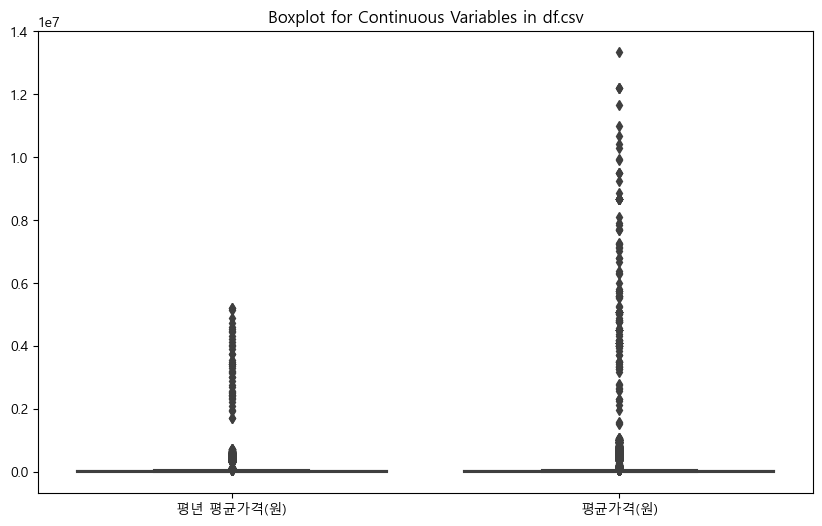

평년 평균가격(원)     750
평균가격(원)       1817
dtype: int64


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 2. 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 이상치 확인: 박스플롯으로 연속형 변수 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['평년 평균가격(원)', '평균가격(원)']])
plt.title('Boxplot for Continuous Variables in df.csv')
plt.show()

# 이상치 확인: 통계적 방법 (IQR 방법)
Q1 = df[['평년 평균가격(원)', '평균가격(원)']].quantile(0.25)
Q3 = df[['평년 평균가격(원)', '평균가격(원)']].quantile(0.75)
IQR = Q3 - Q1

# IQR 범위를 벗어나는 이상치 확인
outliers = ((df[['평년 평균가격(원)', '평균가격(원)']] < (Q1 - 1.5 * IQR)) | 
           (df[['평년 평균가격(원)', '평균가격(원)']] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # 이상치 개수 확인


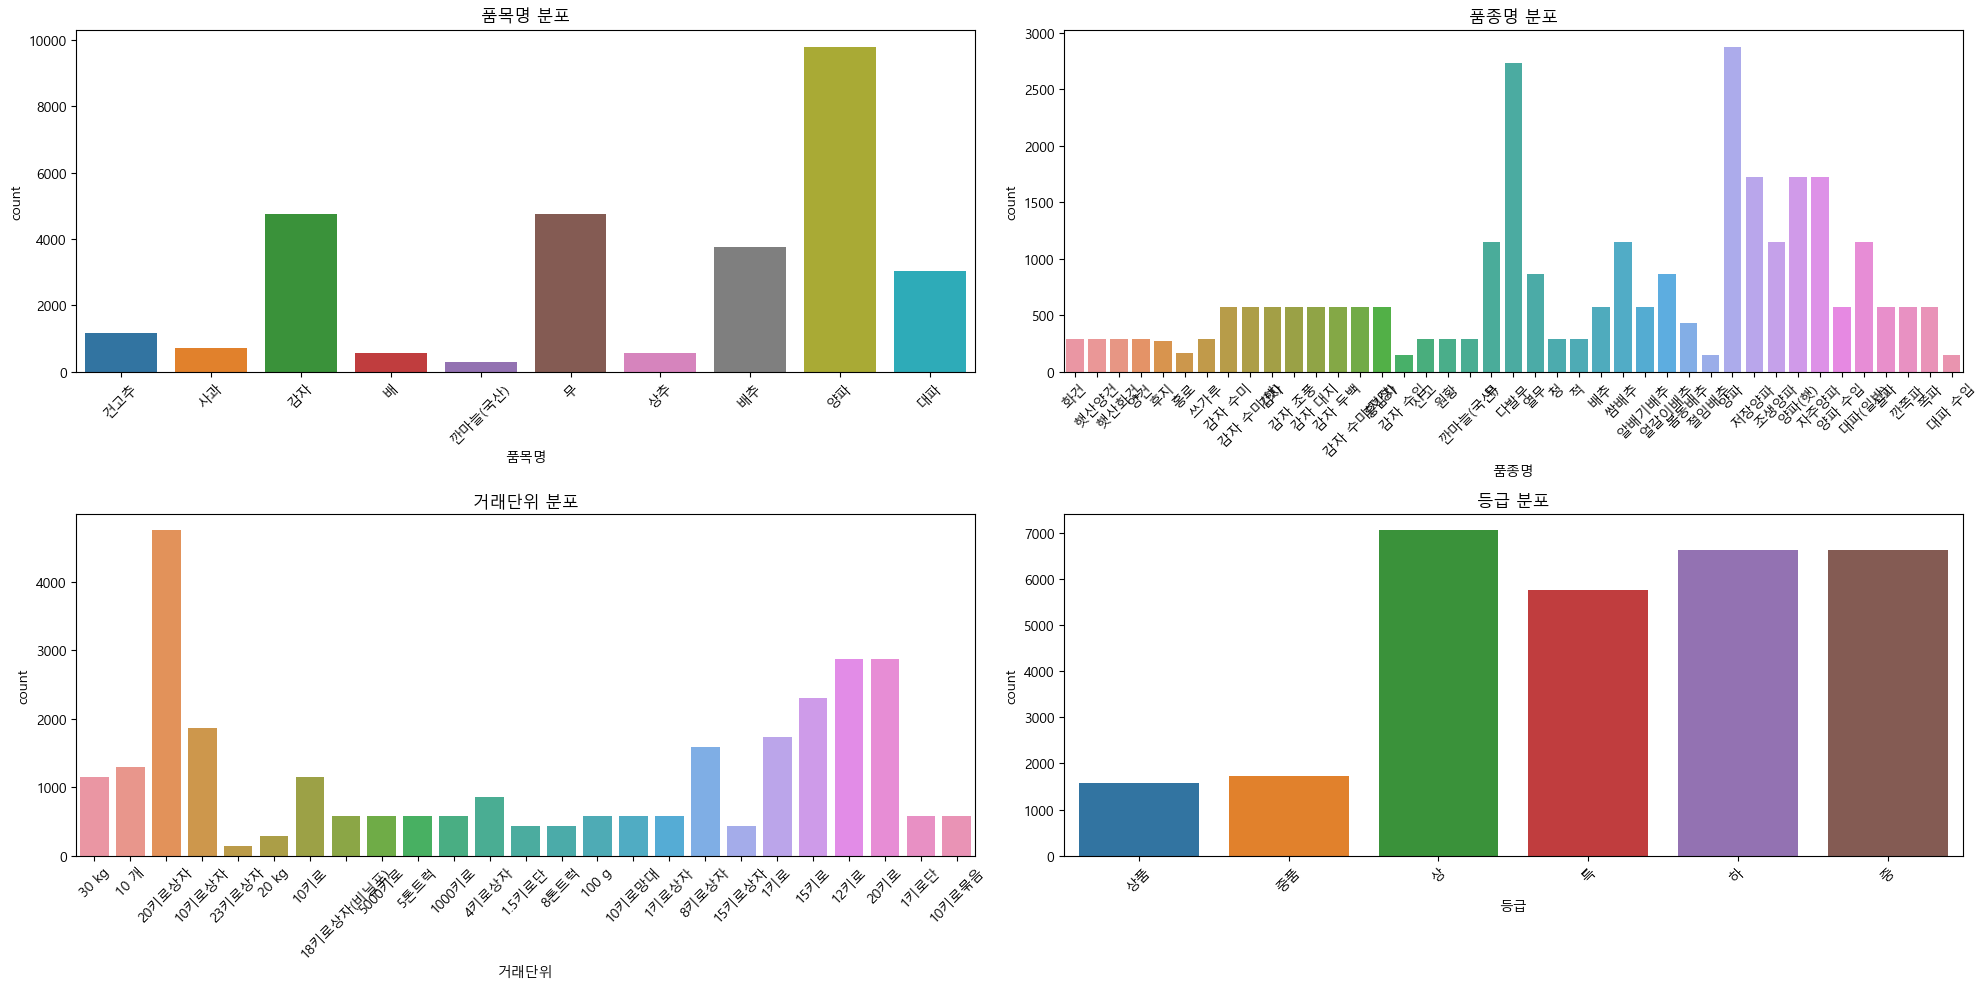

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 범주형 변수들의 분포 확인 (품목명, 품종명, 거래단위, 등급)
category_columns = ['품목명', '품종명', '거래단위', '등급']

# 분포 시각화
plt.figure(figsize=(20, 10))
for i, col in enumerate(category_columns, 1):
    plt.subplot(2, 2, i)  # 2x2 그래프
    sns.countplot(data=df, x=col)
    plt.title(f'{col} 분포')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


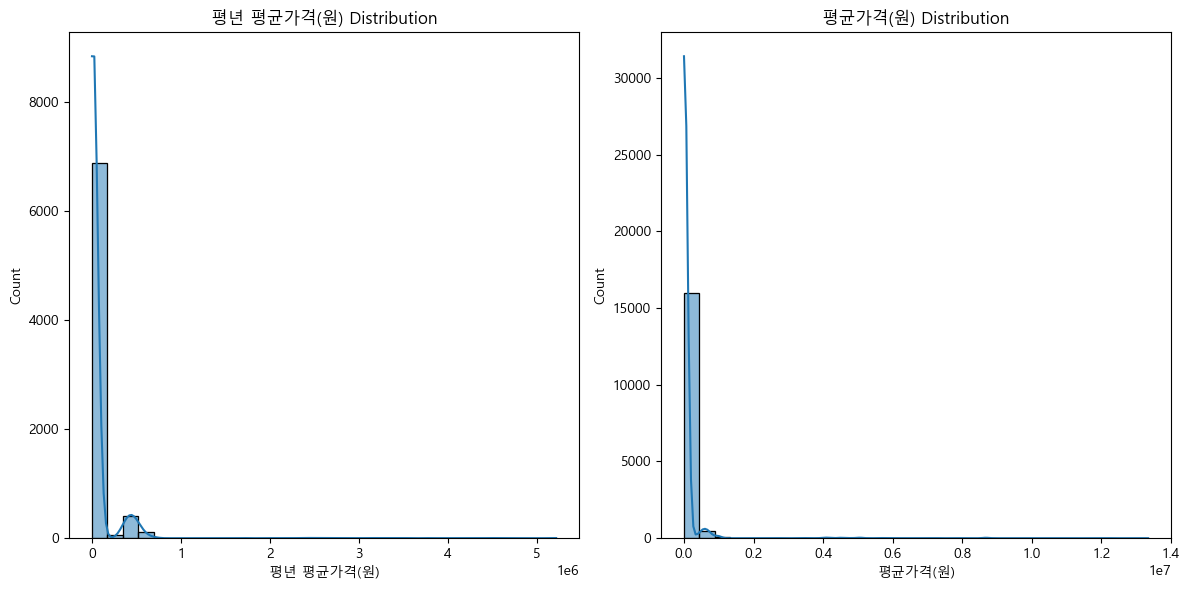

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 연속형 변수들의 분포 확인
train_continuous_columns = ['평년 평균가격(원)', '평균가격(원)']

# train.csv 연속형 변수 시각화
def plot_train_continuous_variables(df):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(train_continuous_columns, 1):
        plt.subplot(1, 2, i)  # 1x2 그래프
        sns.histplot(data=df, x=col, bins=30, kde=True)
        plt.title(f'{col} Distribution')
    
    plt.tight_layout()
    plt.show()

plot_train_continuous_variables(df)


TRAIN_산지공판장

In [66]:
import pandas as pd

# train - train_산지공판장
df = pd.read_csv(r"dataview\data\train\meta\TRAIN_산지공판장_2018-2021.csv", encoding = "utf-8")

In [67]:
df.dtypes

시점                              object
공판장코드                            int64
공판장명                            object
품목코드                             int64
품목명                             object
품종코드                             int64
품종명                             object
등급코드                             int64
등급명                             object
총반입량(kg)                       float64
총거래금액(원)                         int64
평균가(원/kg)                      float64
중간가(원/kg)                      float64
최저가(원/kg)                      float64
최고가(원/kg)                      float64
경매 건수                            int64
전순 평균가격(원) PreVious SOON       float64
전달 평균가격(원) PreVious MMonth     float64
전년 평균가격(원) PreVious YeaR       float64
평년 평균가격(원) Common Year SOON    float64
연도                               int64
dtype: object

In [68]:
import numpy as np

# 결측치로 처리할 다양한 값 지정 (0 포함)
na_values = ['', 'N/A', 'missing', '-', None, np.nan, 0]

# 결측치로 정의한 값들을 실제로 결측치로 변환
df.replace(na_values, np.nan, inplace=True)

# 1. 결측치 확인 (열별 결측치 개수)
print("열별 결측치 개수:")
print(df.isnull().sum())

# 2. 결측치 비율 확인
print("\n열별 결측치 비율:")
print(df.isnull().mean())

# 3. 결측치가 있는 행만 확인
print("\n결측치가 포함된 행:")
print(df[df.isnull().any(axis=1)])

# 4. 결측치 종류 분석
print("\n결측치로 취급된 값들의 종류 확인:")
unique_na_values = {col: df[col].isnull().sum() for col in df.columns}
print(unique_na_values)

열별 결측치 개수:
시점                                  0
공판장코드                               0
공판장명                                0
품목코드                                0
품목명                                 0
품종코드                                0
품종명                                 0
등급코드                                0
등급명                                 0
총반입량(kg)                           10
총거래금액(원)                            0
평균가(원/kg)                          10
중간가(원/kg)                          14
최저가(원/kg)                          10
최고가(원/kg)                          29
경매 건수                               0
전순 평균가격(원) PreVious SOON        32006
전달 평균가격(원) PreVious MMonth      45816
전년 평균가격(원) PreVious YeaR        39221
평년 평균가격(원) Common Year SOON    107696
연도                                  0
dtype: int64

열별 결측치 비율:
시점                             0.000000
공판장코드                          0.000000
공판장명                           0.000000
품목코드                           0.000000
품목명   

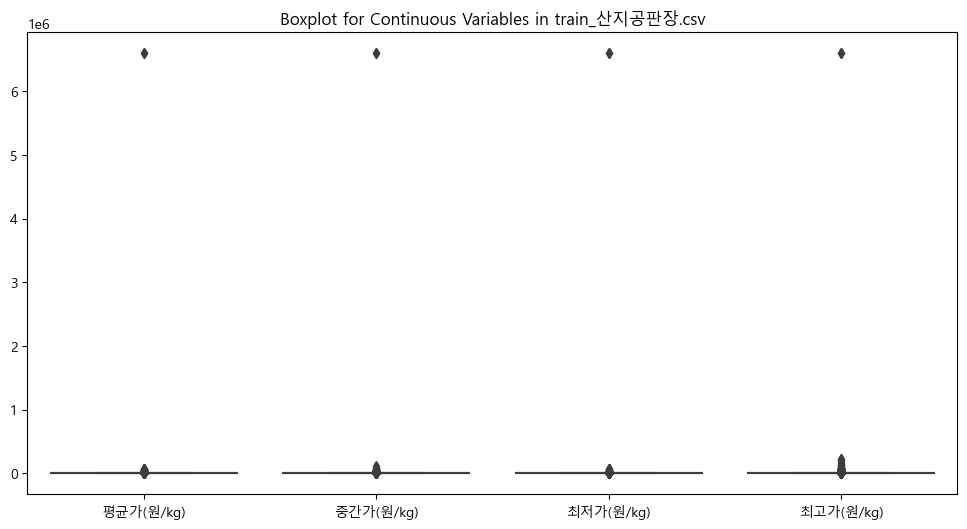

평균가(원/kg)    7135
중간가(원/kg)    7339
최저가(원/kg)    7446
최고가(원/kg)    7401
dtype: int64


In [69]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 2. 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 이상치 확인: 박스플롯으로 연속형 변수 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['평균가(원/kg)', '중간가(원/kg)', '최저가(원/kg)', '최고가(원/kg)']])
plt.title('Boxplot for Continuous Variables in train_산지공판장.csv')
plt.show()

# IQR 방법을 사용한 이상치 탐지
Q1 = df[['평균가(원/kg)', '중간가(원/kg)', '최저가(원/kg)', '최고가(원/kg)']].quantile(0.25)
Q3 = df[['평균가(원/kg)', '중간가(원/kg)', '최저가(원/kg)', '최고가(원/kg)']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['평균가(원/kg)', '중간가(원/kg)', '최저가(원/kg)', '최고가(원/kg)']] < (Q1 - 1.5 * IQR)) | 
           (df[['평균가(원/kg)', '중간가(원/kg)', '최저가(원/kg)', '최고가(원/kg)']] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # 이상치 개수 확인


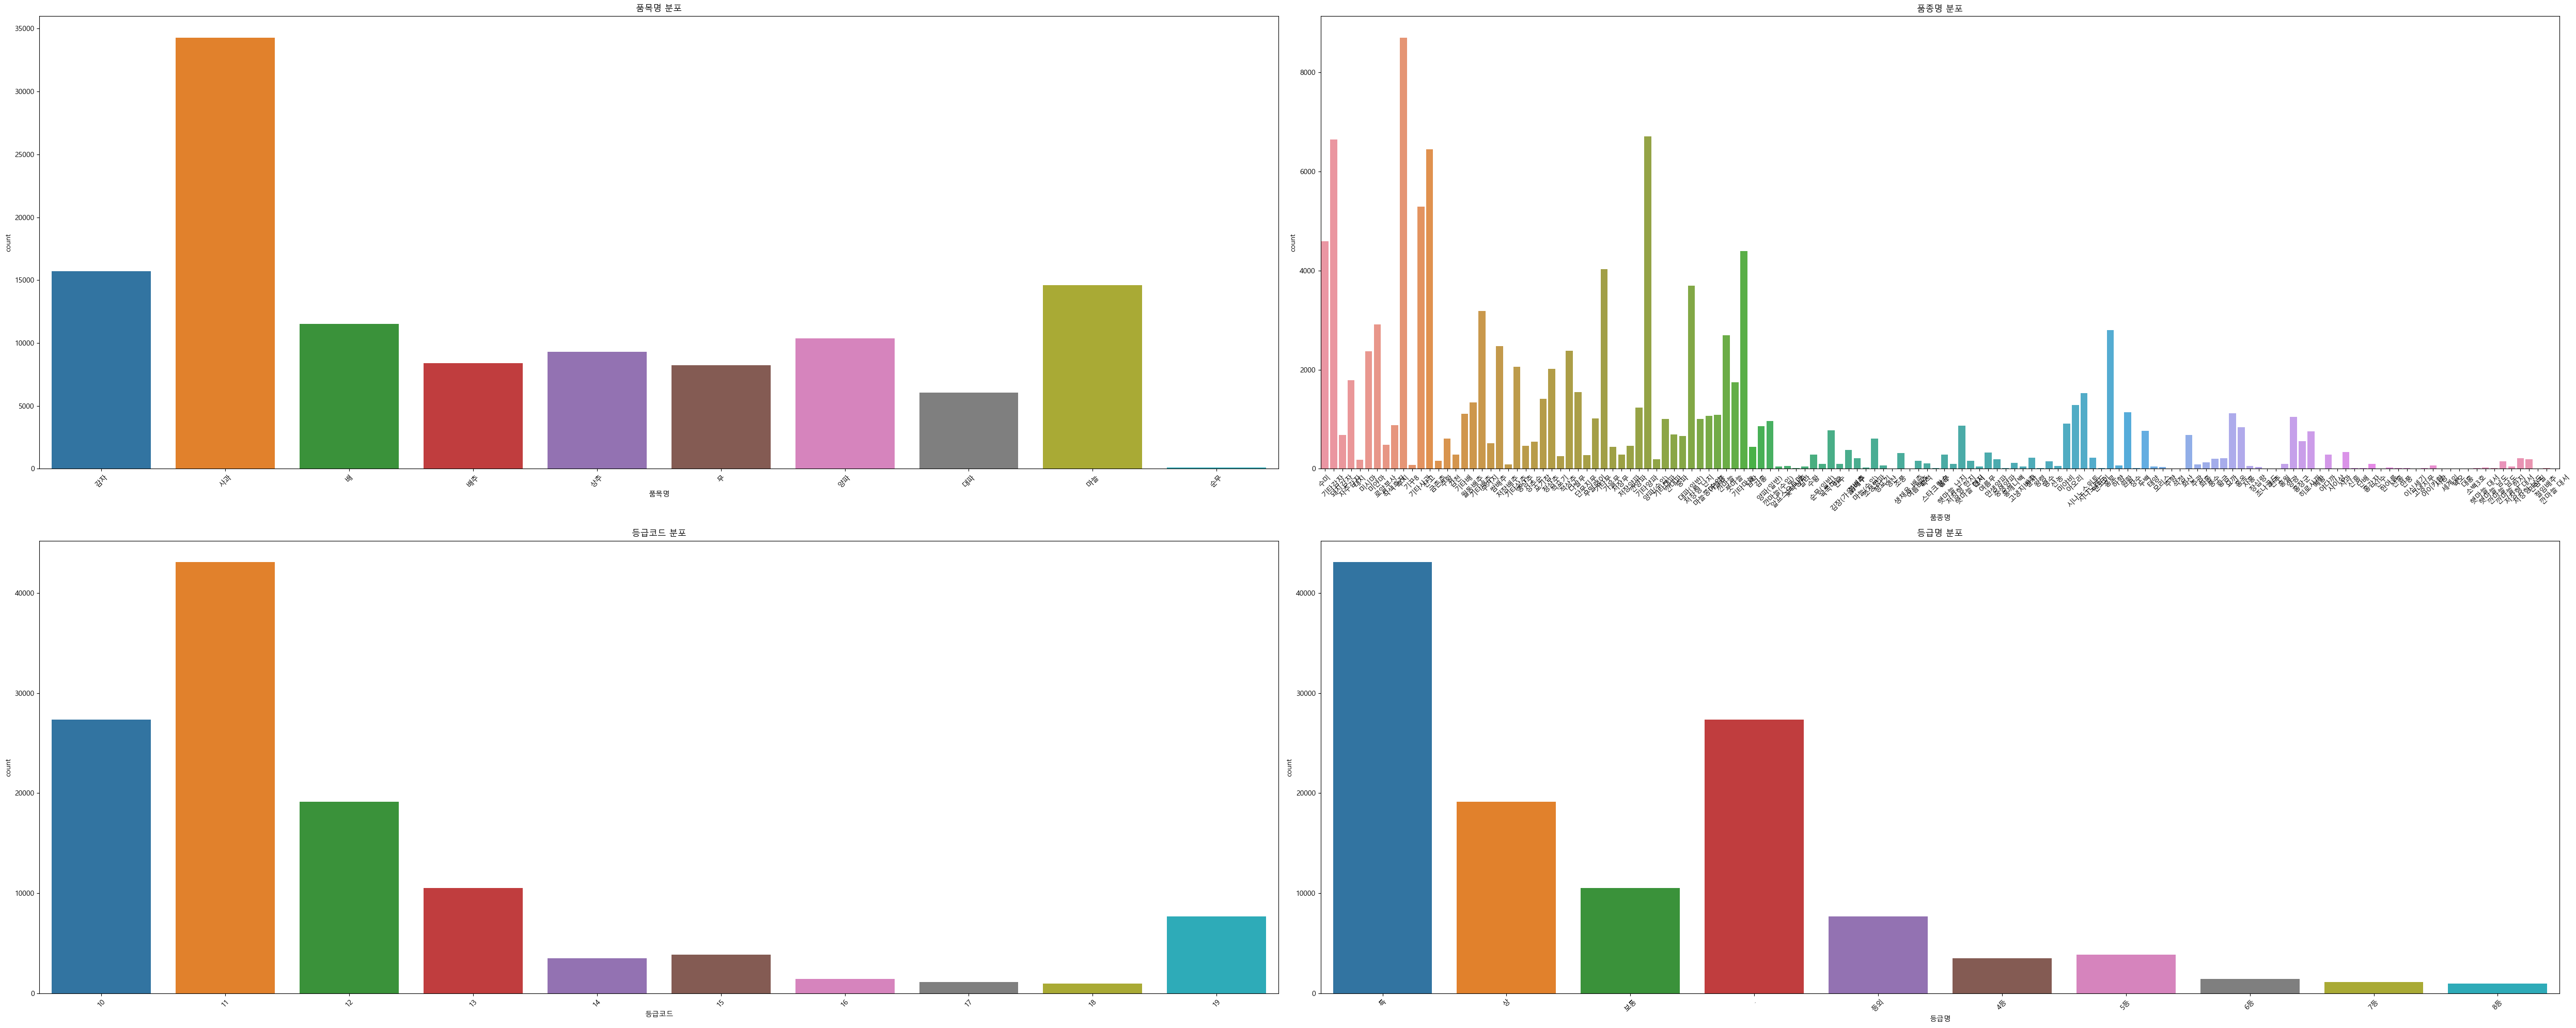

In [70]:
# 범주형 변수들의 분포 확인 (품목명, 품종명, 등급명, 공판장명)
category_columns = ['품목명', '품종명', '등급코드', '등급명']  # '공판장명', 

# 분포 시각화
plt.figure(figsize=(50, 20))
for i, col in enumerate(category_columns, 1):
    plt.subplot(2, 2, i)  # 2x2 그래프
    sns.countplot(data=df, x=col)
    plt.title(f'{col} 분포')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


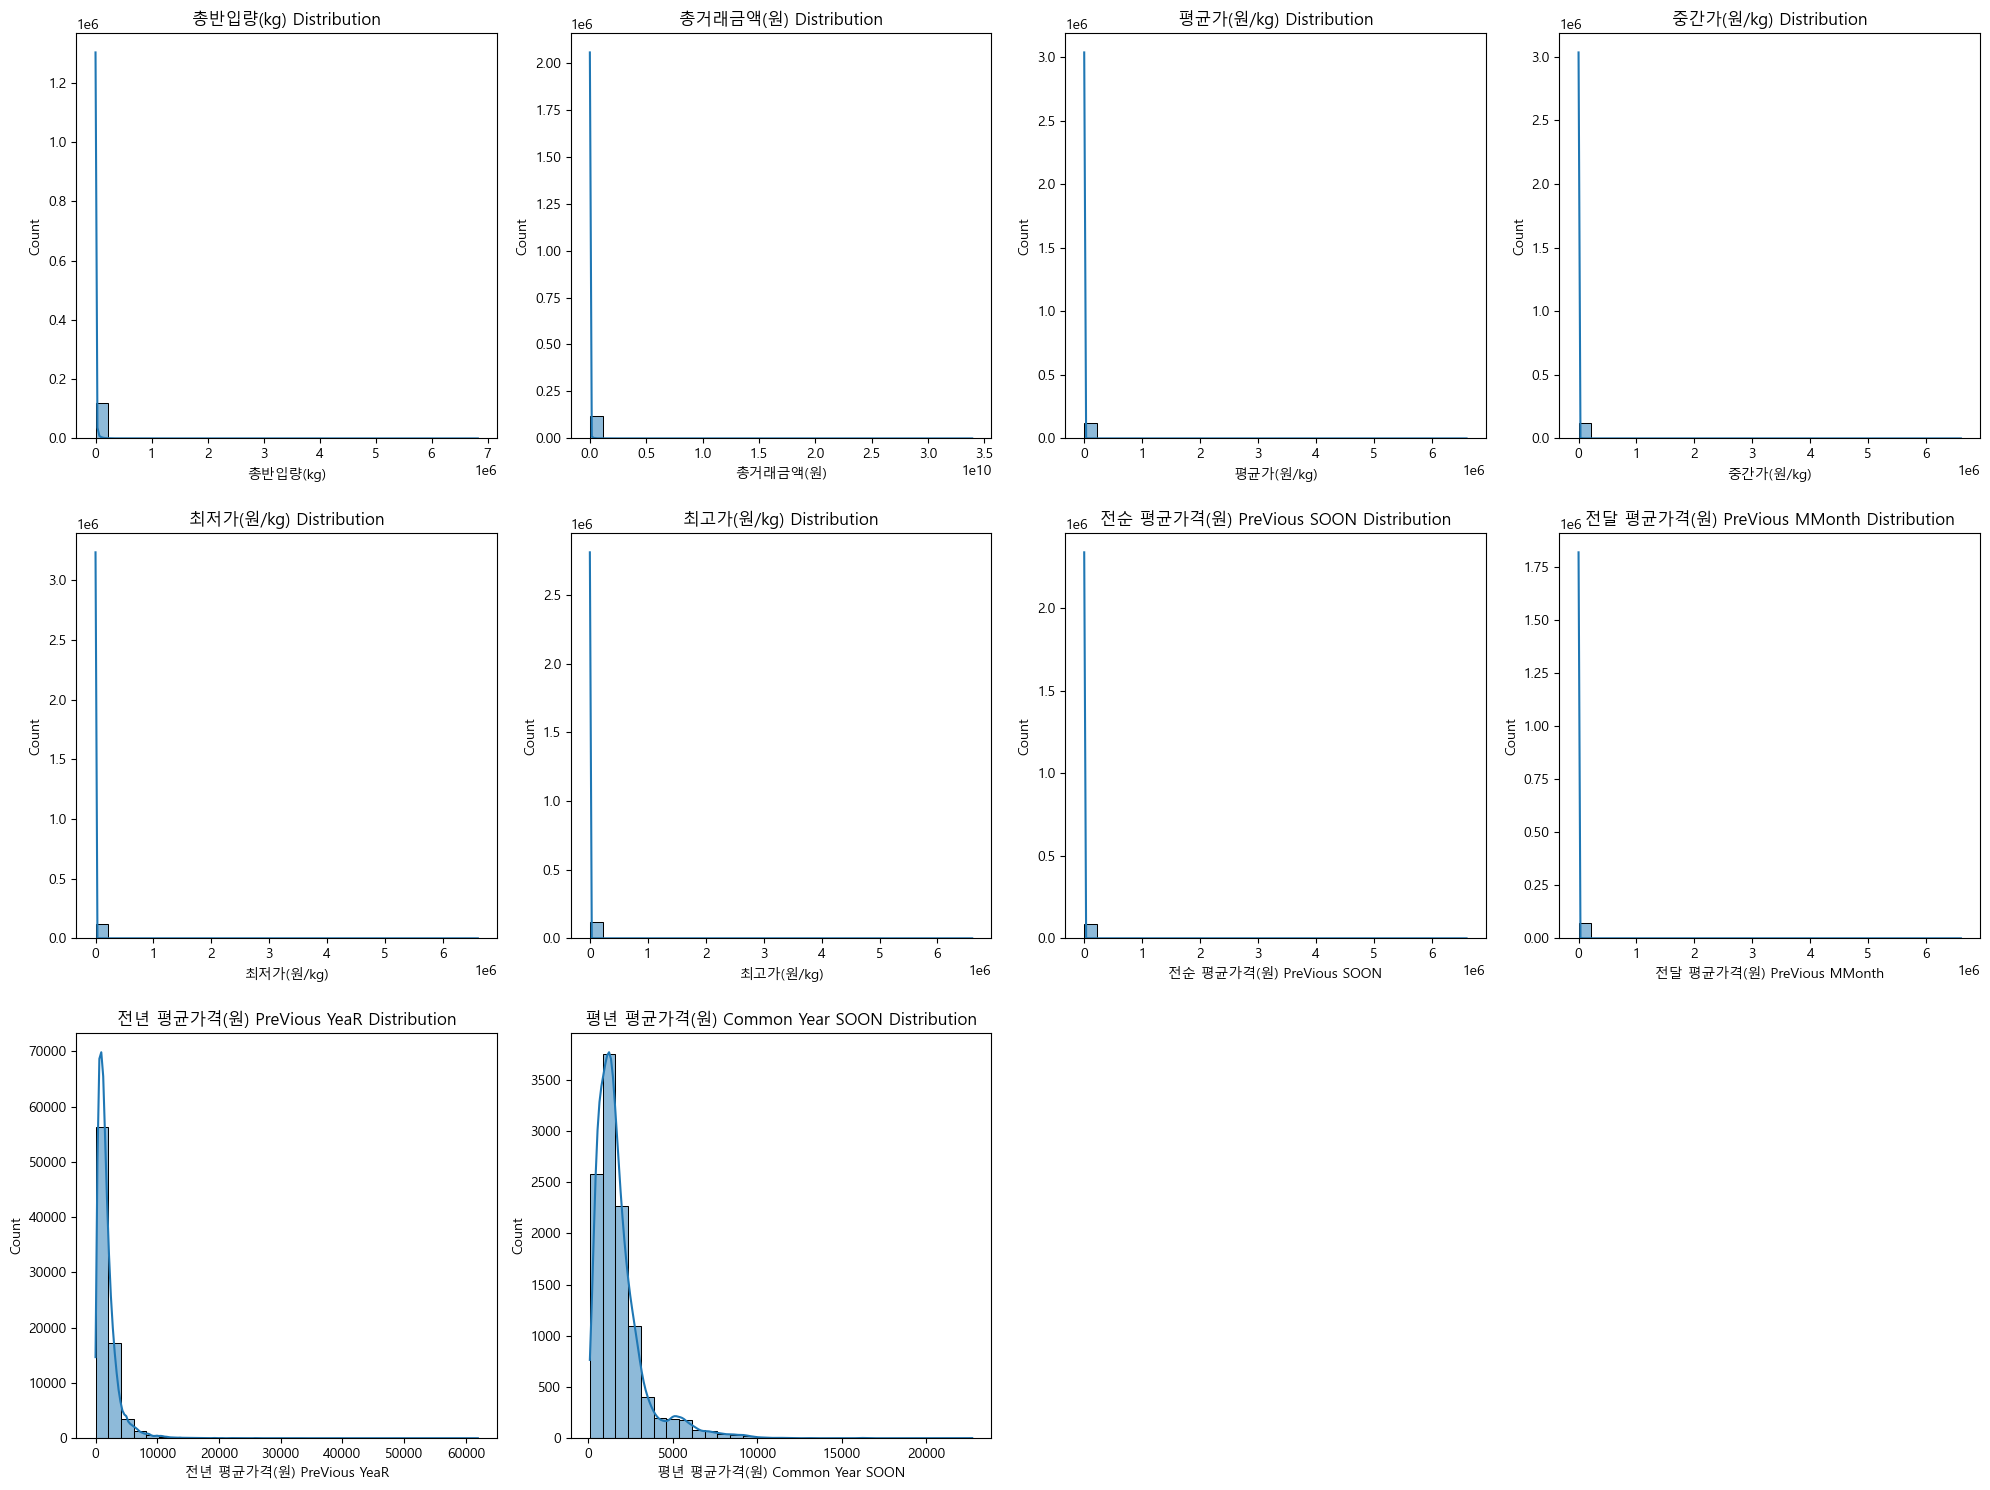

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 연속형 변수들의 분포 확인
sanji_continuous_columns = ['총반입량(kg)', '총거래금액(원)', '평균가(원/kg)', '중간가(원/kg)', '최저가(원/kg)', '최고가(원/kg)',
                            '전순 평균가격(원) PreVious SOON', '전달 평균가격(원) PreVious MMonth', 
                            '전년 평균가격(원) PreVious YeaR', '평년 평균가격(원) Common Year SOON']

# train_산지공판장.csv 연속형 변수 시각화
def plot_sanji_continuous_variables(df):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(sanji_continuous_columns, 1):
        plt.subplot(3, 4, i)  # 3x4 그래프
        sns.histplot(data=df, x=col, bins=30, kde=True)
        plt.title(f'{col} Distribution')
    
    plt.tight_layout()
    plt.show()

plot_sanji_continuous_variables(df)


TRAIN_전국도매

In [72]:
# train - train_전국도매
df = pd.read_csv(r"dataview\data\train\meta\TRAIN_전국도매_2018-2021.csv", encoding = "utf-8")

In [73]:
df.dtypes

시점                              object
시장코드                             int64
시장명                             object
품목코드                             int64
품목명                             object
품종코드                             int64
품종명                             object
총반입량(kg)                       float64
총거래금액(원)                         int64
평균가(원/kg)                      float64
고가(20%) 평균가                    float64
중가(60%) 평균가                    float64
저가(20%) 평균가                    float64
중간가(원/kg)                      float64
최저가(원/kg)                      float64
최고가(원/kg)                      float64
경매 건수                            int64
전순 평균가격(원) PreVious SOON       float64
전달 평균가격(원) PreVious MMonth     float64
전년 평균가격(원) PreVious YeaR       float64
평년 평균가격(원) Common Year SOON    float64
연도                               int64
dtype: object

In [74]:
import numpy as np

# 결측치로 처리할 다양한 값 지정 (0 포함)
na_values = ['', 'N/A', 'missing', '-', None, np.nan, 0]

# 결측치로 정의한 값들을 실제로 결측치로 변환
df.replace(na_values, np.nan, inplace=True)

# 1. 결측치 확인 (열별 결측치 개수)
print("열별 결측치 개수:")
print(df.isnull().sum())

# 2. 결측치 비율 확인
print("\n열별 결측치 비율:")
print(df.isnull().mean())

# 3. 결측치가 있는 행만 확인
print("\n결측치가 포함된 행:")
print(df[df.isnull().any(axis=1)])

# 4. 결측치 종류 분석
print("\n결측치로 취급된 값들의 종류 확인:")
unique_na_values = {col: df[col].isnull().sum() for col in df.columns}
print(unique_na_values)

열별 결측치 개수:
시점                                 0
시장코드                               0
시장명                                0
품목코드                               0
품목명                                0
품종코드                               0
품종명                                0
총반입량(kg)                          57
총거래금액(원)                          44
평균가(원/kg)                         57
고가(20%) 평균가                    47715
중가(60%) 평균가                    24785
저가(20%) 평균가                       59
중간가(원/kg)                         87
최저가(원/kg)                       5279
최고가(원/kg)                        741
경매 건수                              0
전순 평균가격(원) PreVious SOON       20928
전달 평균가격(원) PreVious MMonth     30657
전년 평균가격(원) PreVious YeaR       31536
평년 평균가격(원) Common Year SOON    77505
연도                                 0
dtype: int64

열별 결측치 비율:
시점                             0.000000
시장코드                           0.000000
시장명                            0.000000
품목코드                          

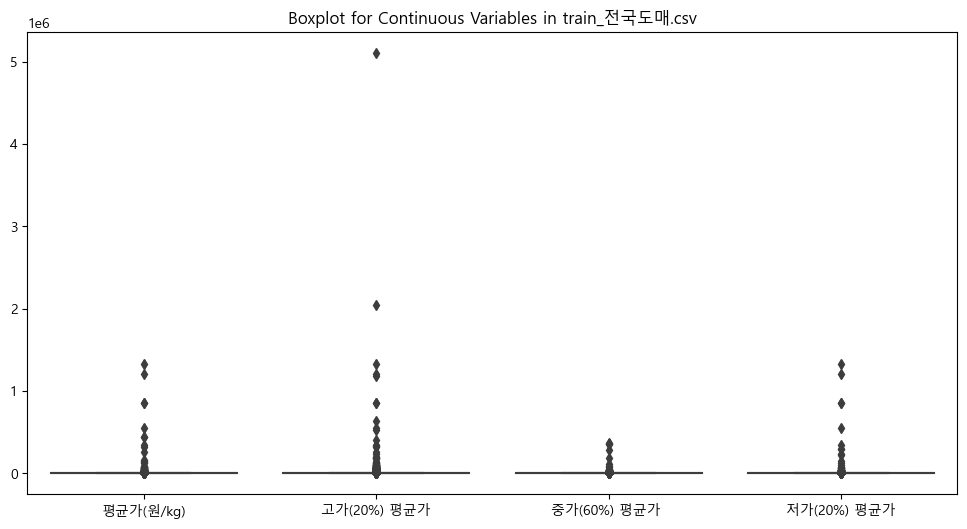

평균가(원/kg)        9700
고가(20%) 평균가      6474
중가(60%) 평균가      8375
저가(20%) 평균가     10456
dtype: int64


In [75]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 2. 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 이상치 확인: 박스플롯으로 연속형 변수 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['평균가(원/kg)', '고가(20%) 평균가', '중가(60%) 평균가 ', '저가(20%) 평균가']])
plt.title('Boxplot for Continuous Variables in train_전국도매.csv')
plt.show()

# IQR 방법을 사용한 이상치 탐지
Q1 = df[['평균가(원/kg)', '고가(20%) 평균가', '중가(60%) 평균가 ', '저가(20%) 평균가']].quantile(0.25)
Q3 = df[['평균가(원/kg)', '고가(20%) 평균가', '중가(60%) 평균가 ', '저가(20%) 평균가']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['평균가(원/kg)', '고가(20%) 평균가', '중가(60%) 평균가 ', '저가(20%) 평균가']] < (Q1 - 1.5 * IQR)) | 
           (df[['평균가(원/kg)', '고가(20%) 평균가', '중가(60%) 평균가 ', '저가(20%) 평균가']] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # 이상치 개수 확인


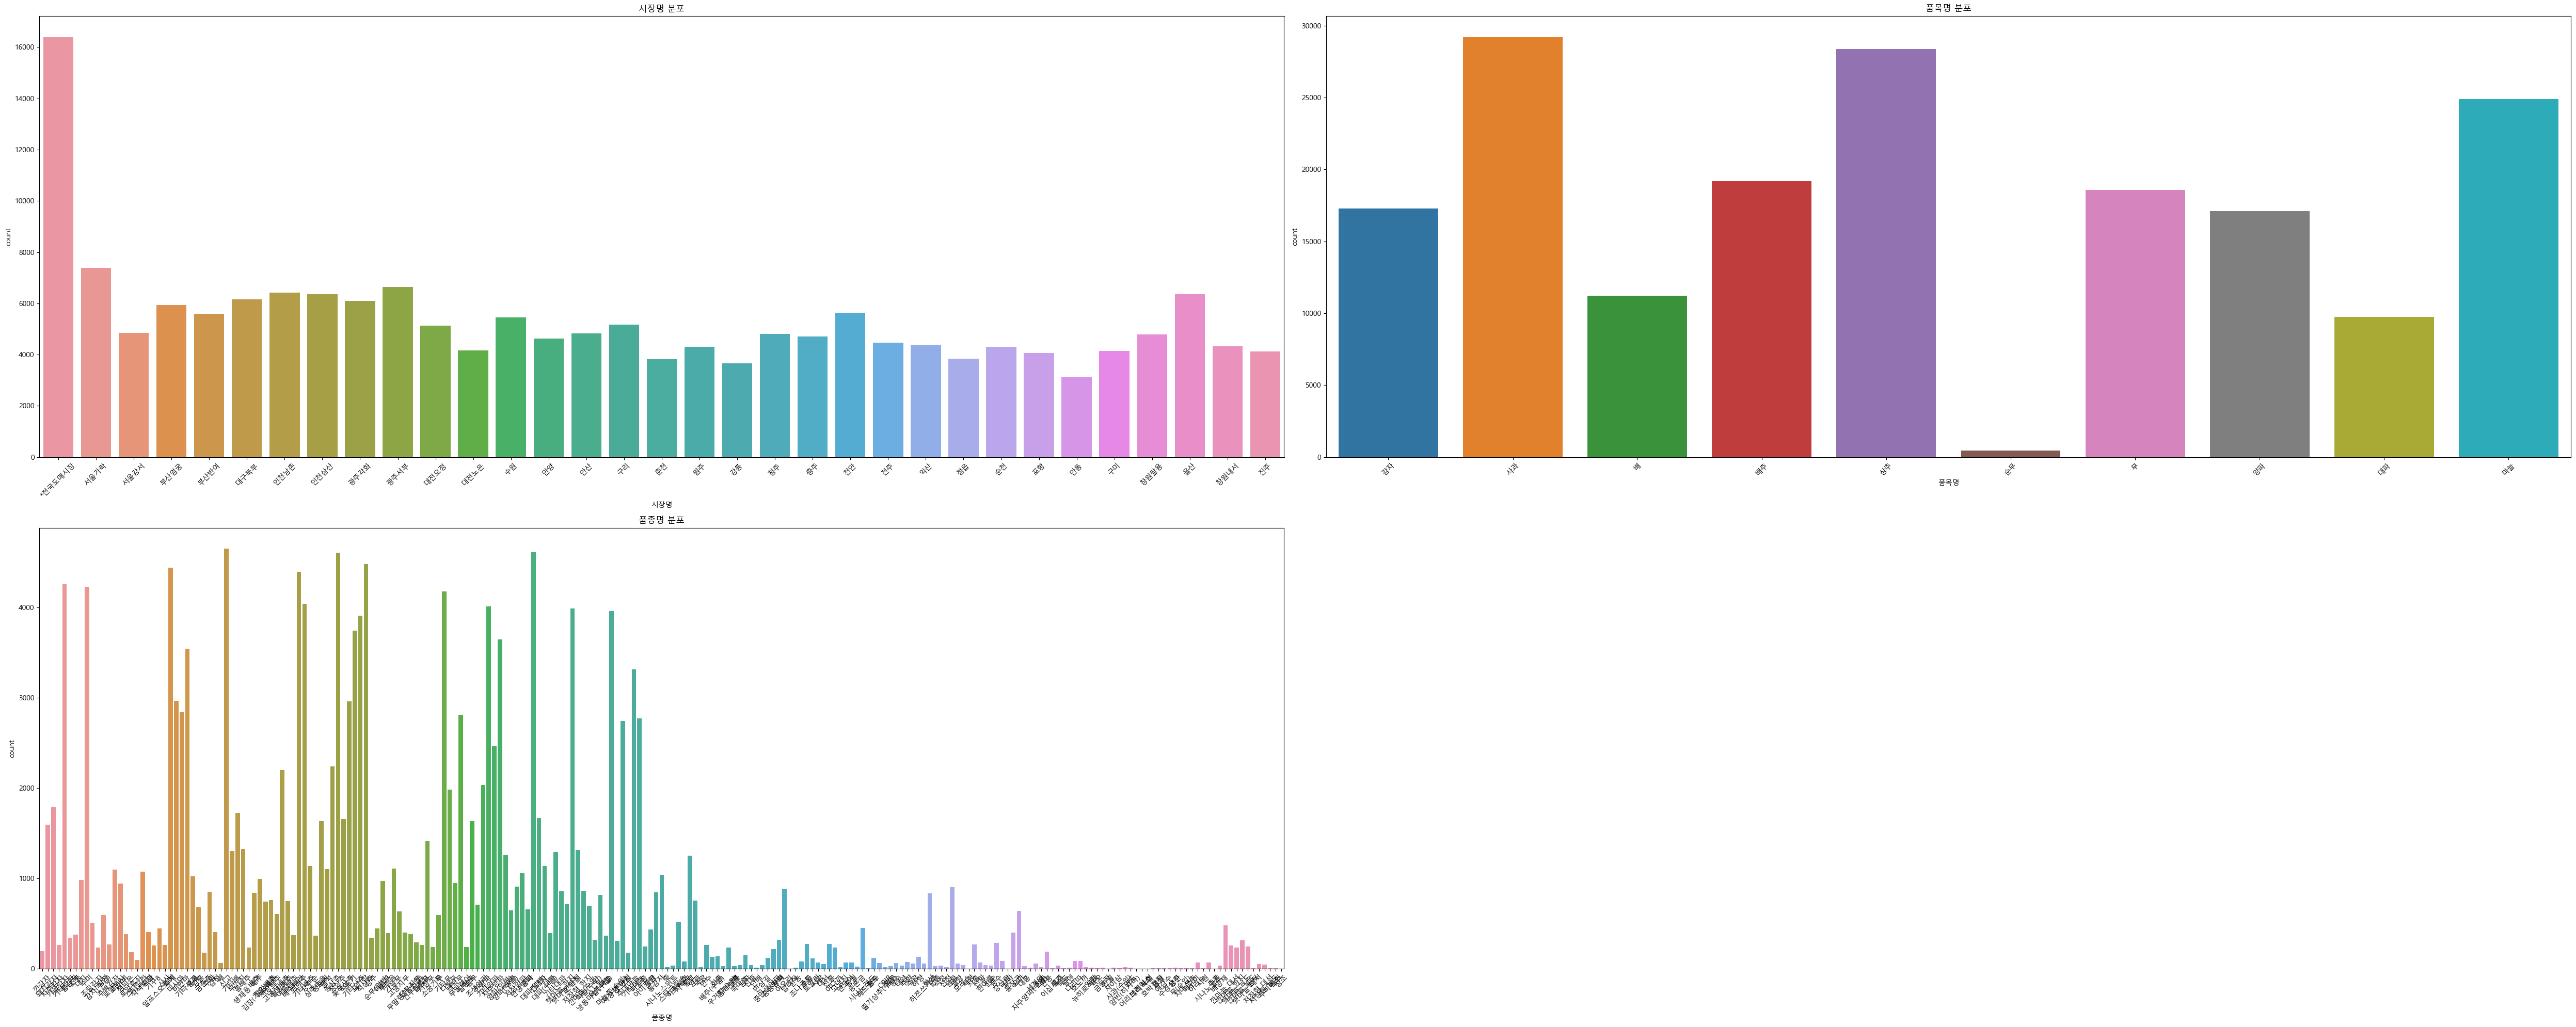

In [76]:
# 범주형 변수들의 분포 확인 (품목명, 품종명, 시장명)
category_columns = ['시장명', '품목명', '품종명']

# 분포 시각화
plt.figure(figsize=(50, 20))
for i, col in enumerate(category_columns, 1):
    plt.subplot(2, 2, i)  # 2x2 그래프
    sns.countplot(data=df, x=col)
    plt.title(f'{col} 분포')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


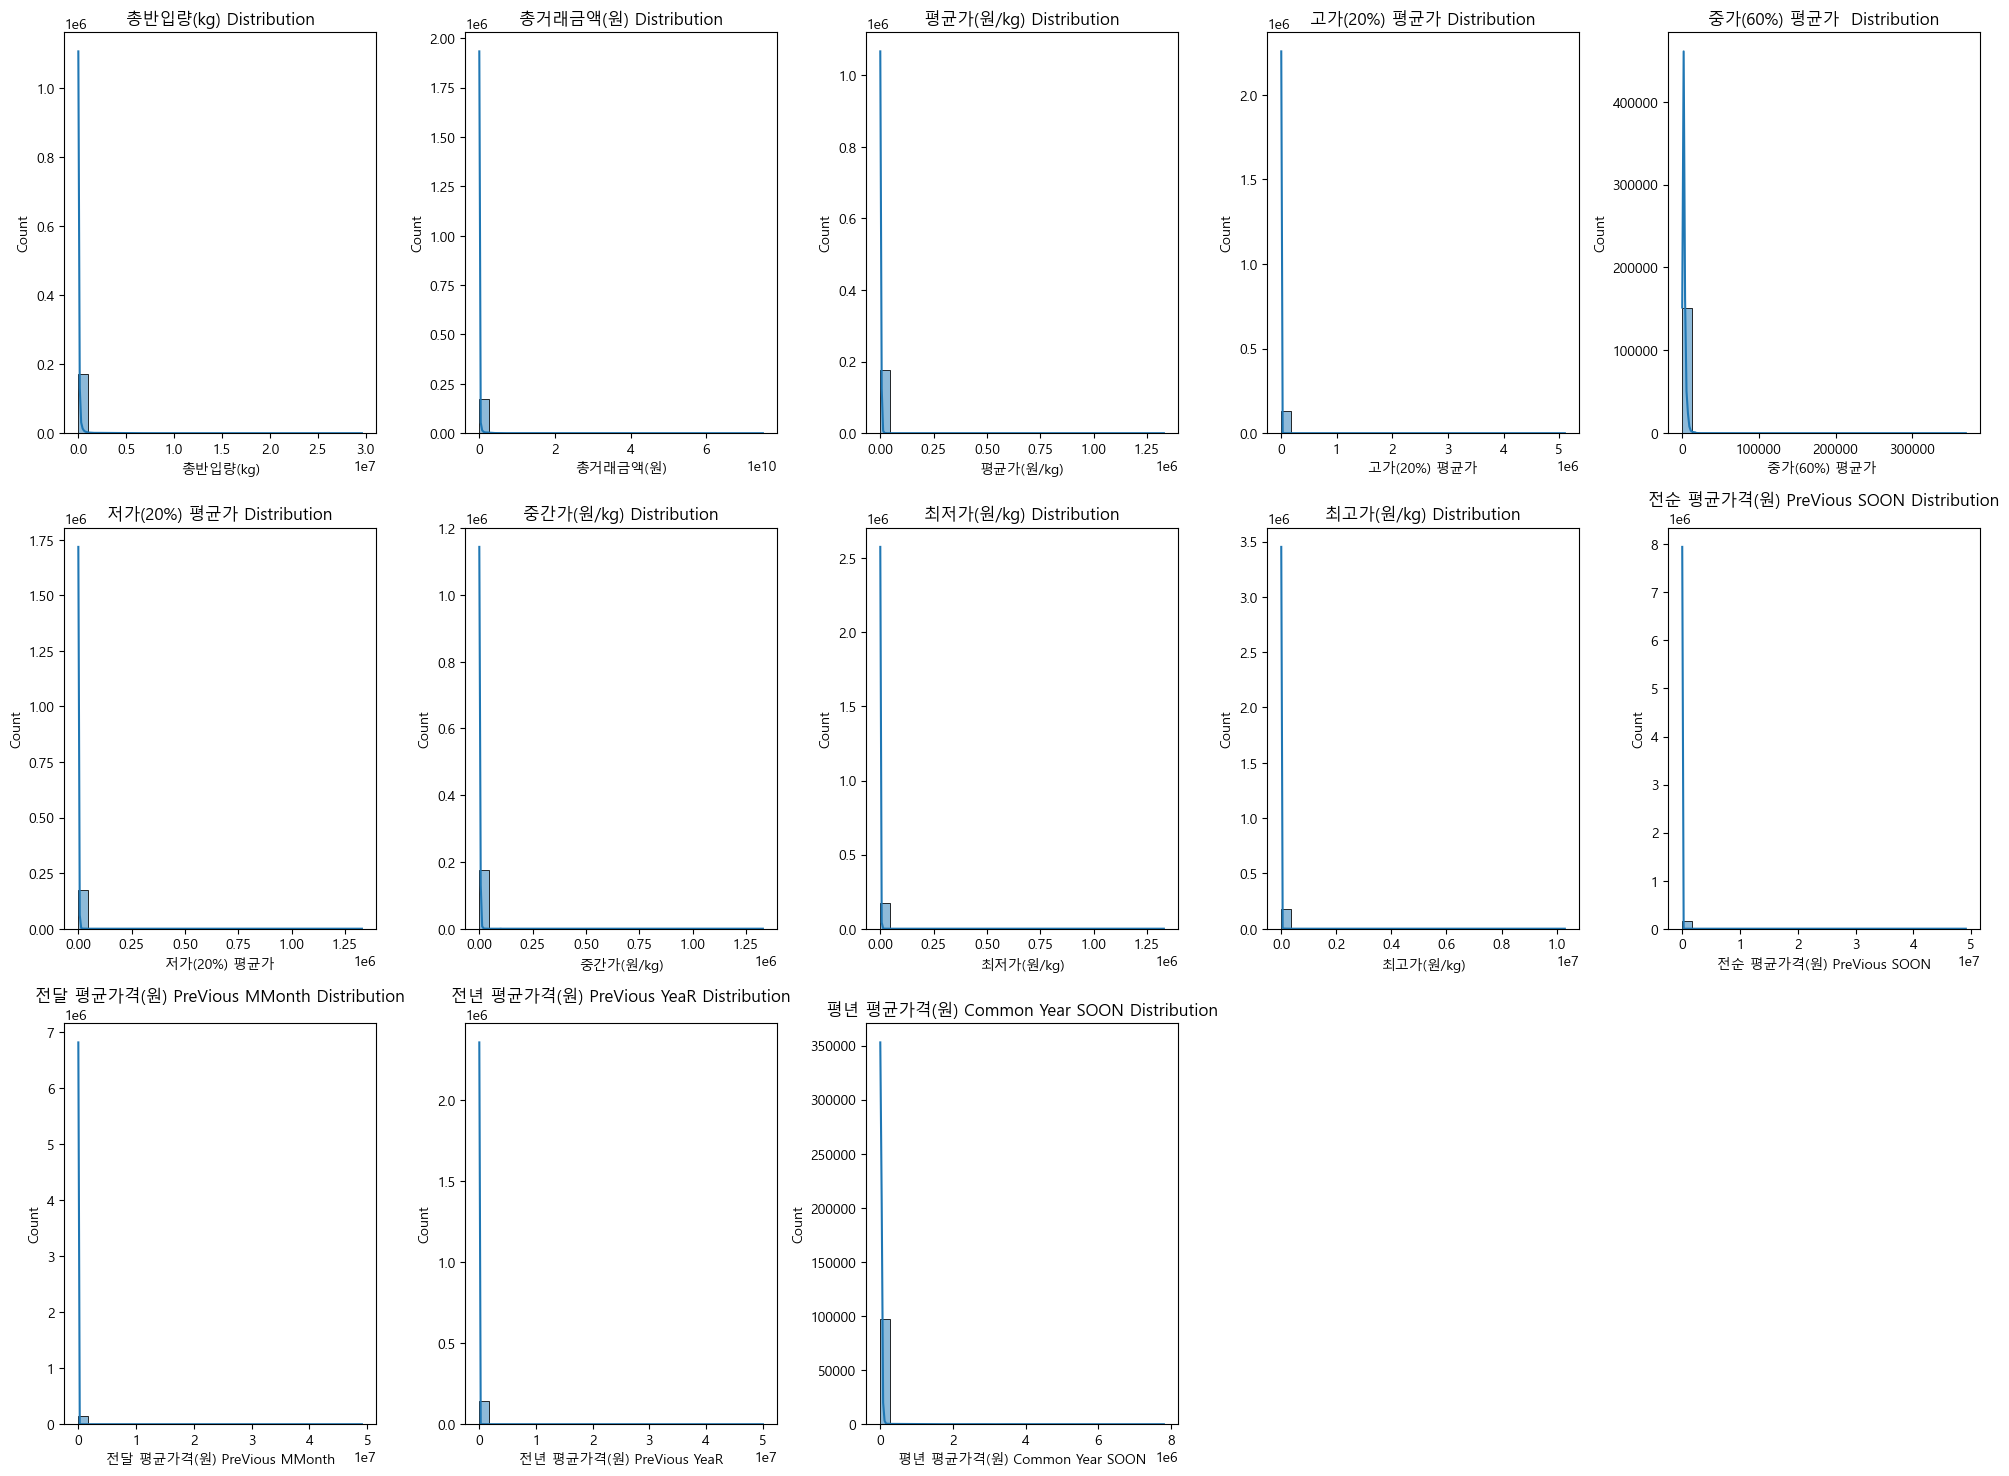

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 연속형 변수들의 분포 확인
domaee_continuous_columns = ['총반입량(kg)', '총거래금액(원)', '평균가(원/kg)', '고가(20%) 평균가', '중가(60%) 평균가 ',
                             '저가(20%) 평균가', '중간가(원/kg)', '최저가(원/kg)', '최고가(원/kg)',
                             '전순 평균가격(원) PreVious SOON', '전달 평균가격(원) PreVious MMonth', 
                             '전년 평균가격(원) PreVious YeaR', '평년 평균가격(원) Common Year SOON']

# train_전국도매.csv 연속형 변수 시각화
def plot_domaee_continuous_variables(df):
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(domaee_continuous_columns, 1):
        plt.subplot(3, 5, i)  # 3x5 그래프
        sns.histplot(data=df, x=col, bins=30, kde=True)
        plt.title(f'{col} Distribution')
    
    plt.tight_layout()
    plt.show()

plot_domaee_continuous_variables(df)
